# Статистический анализ данных сервиса аренды самокатов GoFast
Вы аналитик популярного сервиса аренды самокатов GoFast. Вам передали данные о некоторых пользователях из нескольких городов, а также об их поездках. Проанализируйте данные и проверьте некоторые гипотезы, которые могут помочь бизнесу вырасти.  
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.  
Сервисом можно пользоваться:  
1. без подписки  
абонентская плата отсутствует;  
стоимость одной минуты поездки — 8 рублей;  
стоимость старта (начала поездки) — 50 рублей;  

2. с подпиской Ultra  
абонентская плата — 199 рублей в месяц;  
стоимость одной минуты поездки — 6 рублей;  
стоимость старта — бесплатно.

**Описание данных**  
В основных данных есть информация о пользователях, их поездках и подписках.  

## Шаг 1. Загрузка данных

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt 
from math import factorial
from scipy import stats as st
from scipy.stats import binom

Считаем CSV-файлы с данными с помощью библиотеки pandas и сохраняем их в датафреймы.

In [2]:
df_users_go = pd.read_csv('/datasets/users_go.csv')

In [3]:
df_rides_go = pd.read_csv('/datasets/rides_go.csv')

In [4]:
df_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

Выведим первые строки каждого набора данных. 

In [5]:
df_users_go.head(10) # получение первых 10 строк таблицы df_users_go

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [6]:
df_rides_go.head(10)  # получение первых 10 строк таблицы df_rides_go

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
df_subscriptions_go.head()  # получение строк таблицы df_subscriptions_go

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Изучим общую информацию о каждом датафрейме.

In [8]:
df_users_go.info() # получение общей информации о данных в таблице df_users_go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [9]:
df_rides_go.info() # получение общей информации о данных в таблице df_rides_go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [10]:
df_subscriptions_go.info() # получение общей информации о данных в таблице df_rides_go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Количества значений в столбцах таблиц не различается. Значит, в данных нет пропущенных значений. Следующим шагом необходимо проверить на явные и неявные дубликаты данные таблицы.

In [11]:
df_users_go.duplicated().sum() # подсчёт явных дубликатов в таблице df_users_go

31

In [12]:
df_rides_go.duplicated().sum() # подсчёт явных дубликатов в таблице df_rides_go

0

In [13]:
df_subscriptions_go.duplicated().sum() # подсчёт явных дубликатов в таблице df_subscriptions_go

0

Изучим описательную статистику по столбцам каждой из таблиц.

In [14]:
df_users_go.describe()

,user_id,age
count,1565.000000,1565.000000
mean,762.633866,24.922045
std,443.260155,4.553496
min,1.000000,12.000000
25%,378.000000,22.000000
50%,762.000000,25.000000
75%,1146.000000,28.000000
max,1534.000000,43.000000


In [15]:
df_rides_go.describe()

,user_id,distance,duration
count,18068.000000,18068.000000,18068.000000
mean,842.869936,3070.659976,17.805011
std,434.734317,1116.831209,6.091051
min,1.000000,0.855683,0.500000
25%,487.000000,2543.226360,13.597563
50%,889.000000,3133.609994,17.678395
75%,1213.250000,3776.222735,21.724800
max,1534.000000,7211.007745,40.823963


In [16]:
df_subscriptions_go.describe()

,minute_price,start_ride_price,subscription_fee
count,2.000000,2.000000,2.000000
mean,7.000000,25.000000,99.500000
std,1.414214,35.355339,140.714249
min,6.000000,0.000000,0.000000
25%,6.500000,12.500000,49.750000
50%,7.000000,25.000000,99.500000
75%,7.500000,37.500000,149.250000
max,8.000000,50.000000,199.000000


Построем гистограммы для данных таблиц.

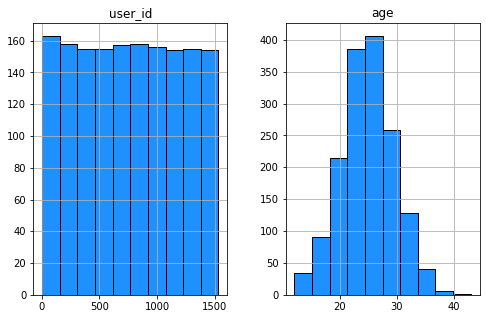

In [17]:
df_users_go.hist(figsize=(8, 5), color='dodgerblue', ec='black') # построение гистограммы для таблицы df_users_go
plt.show()

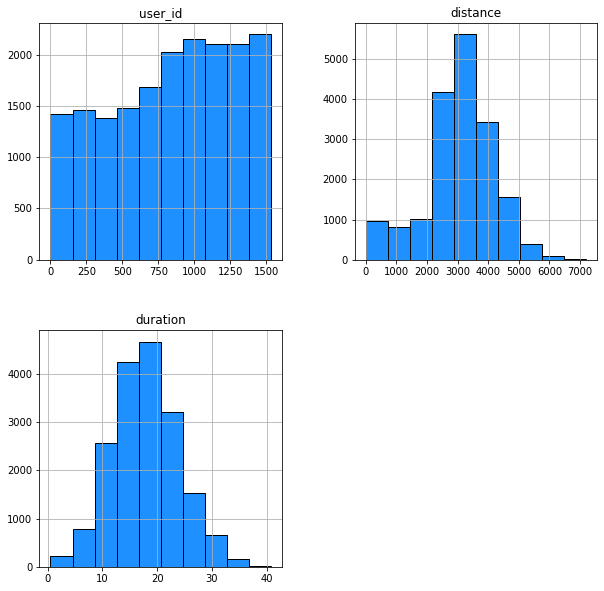

In [18]:
df_rides_go.hist(figsize=(10, 10), color='dodgerblue', ec='black') # построение гистограммы для таблицы df_rides_go
plt.show()

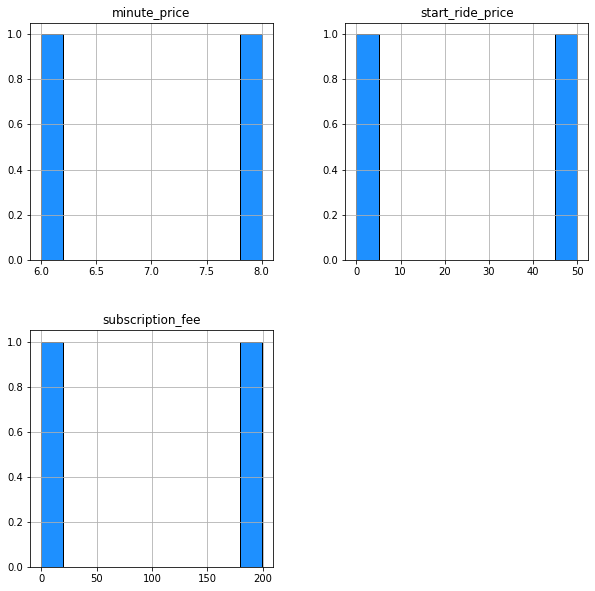

In [19]:
# построение гистограммы для таблицы df_subscriptions_go
df_subscriptions_go.hist(figsize=(10, 10), color='dodgerblue', ec='black') 
plt.show()

**Выводы**

В первой таблице "users_go.csv" находится информация о пользователях сервиса аренды самокатов GoFast.  
В стобце "user_id" - уникальный идентификатор пользователя, в столбце "name" - имя пользователя, в столбце "age" - возраст, в столбце "city" - город, в столбце "subscription_type" - тип подписки (free, ultra).  
Подсчёт явных дубликатов в таблице показал, что в ней находится 31 дубликат. Это составляет около 2% от общего количество строк.
На этапе предобработки данных эти дубликаты можно будет удалить. Нет аномальных или нестандартных значений.

Во второй таблице "rides_go.csv" находится информация о поездках пользователей сервиса аренды самокатов GoFast.  
В стобце "user_id" - уникальный идентификатор пользователя, в столбце "distance" - расстояние, которое пользователь проехал в текущей сессии (в метрах), в столбце "duration" - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку», в столбце "date" - дата совершения поездки.
Возможно наличие выбросов в столбцах "distance" и "duration". Необходимо проверить на этапе предобработки данных.

В третьей таблице "subscriptions_go.csv" находится информация о подписках пользователей сервиса аренды самокатов GoFast.  
В стобце "subscription_type" - тип подписки, в столбце "minute_price" - стоимость одной минуты поездки по данной подписке, в столбце "start_ride_price" - стоимость начала поездки, в столбце "subscription_fee" - стоимость ежемесячного платежа.  Нет аномальных или нестандартных значений.

На этапе предобработки данных необходимо изменить тип данных во второй таблице "rides_go.csv": "date".

Не встречаются пропуски в данных, в названиях колонок нет расхождения с хорошим стилем. 

Чтобы двигаться дальше, нужно провести предобработку данных.

## Шаг 2. Предобработка данных

1. Приведем столбец date к типу даты pandas.  
2. Создадим новый столбец с номером месяца на основе столбца date.  
3. Проверим наличие пропущенных значений и дубликатов в датафреймах. Обработаем их, если такие значения присутствуют.

Начнем предобработку с установки корректных типов данных.

In [20]:
df_users_go.loc[df_users_go['subscription_type'] == 'ultra', 'subscription_type'] = True
df_users_go.loc[df_users_go['subscription_type'] == 'free', 'subscription_type'] = False

In [21]:
df_subscriptions_go.loc[df_subscriptions_go['subscription_type'] == 'ultra', 'subscription_type'] = True
df_subscriptions_go.loc[df_subscriptions_go['subscription_type'] == 'free', 'subscription_type'] = False

In [22]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'], format='%Y-%m-%d') # изменим тип данных

Создадим новый столбец с номером месяца на основе столбца "date".

In [23]:
df_rides_go['month'] = df_rides_go['date'].dt.month
df_rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [24]:
print('Период: c', df_rides_go.date.min(),'по', df_rides_go.date.max())

Период: c 2021-01-01 00:00:00 по 2021-12-30 00:00:00


В предыдущем пункте мы проверили наличие пропущенных значений и явных дубликатов в датафреймах. Пропущенных значений не обнаружено. Было найдено несколько явных дубликатов в таблице "df_users_go". Идалим их.

In [25]:
df_users_go.duplicated().sum() # подсчёт явных дубликатов в таблице df_users_go

31

In [26]:
# удаление явных дубликатов, создание новых индексов и удаление старых
df_users_go = df_users_go.drop_duplicates().reset_index(drop=True) 

In [27]:
df_users_go.duplicated().sum() # проверка на отсутствие явных дубликатов

0

Неявные дубликаты могут храниться в таблице "df_users_go" в столбце "city". Проверим их.

In [28]:
df_users_go['city'].value_counts() # проверим наличие неявные дубликаты в названиях городов

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

Неявных дубликатов нет.

Возможно наличие выбросов в столбцах "distance" и "duration". Проверим боксплотом.

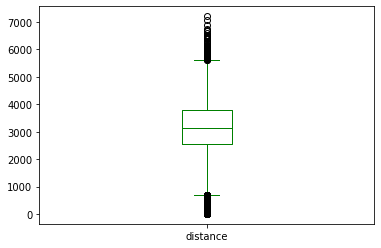

In [29]:
df_rides_go.boxplot(column=['distance'], grid= False , color='g')
plt.show()

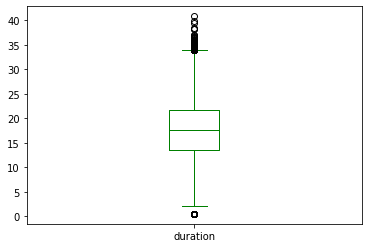

In [30]:
df_rides_go.boxplot(column=['duration'], grid= False , color='g')
plt.show()

В столбце "distance" показано расстояние, которое пользователь проехал в текущей сессии (в метрах). Минимальное значение составляет менее 1 метра при среднем значении 3100 метров.  
Аналогичная ситуация и в столбце "duration", показывающем продолжительность сессии (в минутах). Минимальное значение составляет составляет 0,5 мин при среднем значении 17,7 мин.  
По боксплоту можно сделать выводы, что значения выходящие за нижную и за верхнюю границы яляются выбросами. В нашем случае, скорее вызывают сомнения значения, выходящие только за нижнии границы. Минимальные значения могут означать то, что самокаты не исправны. Пока эти данные оставим без изменения. 

Посмотрим на таблицы после предобаботки данных.

In [31]:
df_users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,True
1,2,Станислав,31,Омск,True
2,3,Алексей,20,Москва,True
3,4,Константин,26,Ростов-на-Дону,True
4,5,Адель,28,Омск,True


In [32]:
df_rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


In [33]:
df_subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,False,8,50,0
1,True,6,0,199


**Выводы**

На этапе предобработки данных мы изменили тип данных во второй таблице "rides_go.csv" в столбце "date". Столбец "date" приведен к типу даты "pandas". На основе этого столбца мы создали новый столбец "month" с номером месяца. Нашли общий период. Период: c 2021-01-01 00:00:00 по 2021-12-30 00:00:00.    

Проверили на наличие пропущенных значений и дубликатов в датафреймах. Подсчёт явных дубликатов в таблице "users_go.csv" показал, что в ней находится 31 дубликат. Мы их удалили. Пропущенных значений не обнаружено. Неявных дубликатов не обнаружено.  

При проверке столбцов "distance" и "duration" на наличие выбросов по борсплоту были найдены значения, выходящие за границы усов.   
В столбце "distance" показано расстояние, которое пользователь проехал в текущей сессии (в метрах). Минимальное значение составляет менее 1 метра при среднем значении 3100 метров. Аналогичная ситуация и в столбце "duration", показывающем продолжительность сессии (в минутах). Минимальное значение составляет составляет 0,5 мин при среднем значении 17,7 мин.  
По боксплоту можно сделать выводы, что значения выходящие за нижную и за верхнюю границы яляются выбросами. В нашем случае, скорее вызывают сомнения значения, выходящие только за нижнии границы. Минимальные значения могут означать то, что самокаты не исправны. Пока эти данные оставим без изменения.  

Далее проведем исследовательский анализ данных.

## Шаг 3. Исследовательский анализ данных

Опишем и визуализируем общую информацию о пользователях и поездках:  
1. частота встречаемости городов;  
2. соотношение пользователей с подпиской и без подписки;  
3. возраст пользователей;  
4. расстояние, которое пользователь преодолел за одну поездку;  
5. продолжительность поездок.

**Найдем частоту встречаемости городов**

Построем барплот, показывающий количество пользователей в городах. Расположим города в порядке убывания от самого популярного к самому непопулярному, предварительно сгруппировав их.

In [34]:
df_users_go['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

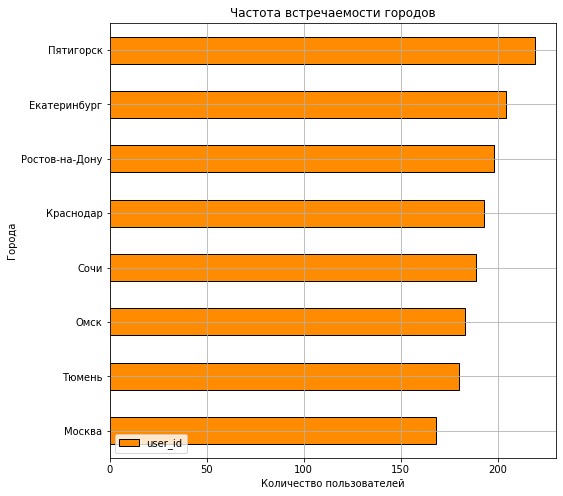

In [35]:
(
    df_users_go.pivot_table(index = 'city', values = 'user_id', aggfunc = 'count')
    .sort_values(by='user_id', ascending = True)
    .plot( kind='barh', color='darkorange',  ec='black', figsize=(8, 8), grid = True )
)
plt.title('Частота встречаемости городов')
plt.xlabel('Количество пользователей')
plt.ylabel('Города')
plt.legend(loc='lower left')
plt.show()

В таблице содержится информация о 8 городах. Лидерами встречаемости сервиса среди пользователей являются Пятигорск 14,3%, Екатеринбург 13,3% и Ростов-на-Дону 12,9% упоминаний. Замыкает список Москва 11%.

**Изучим соотношение пользователей с подпиской и без подписки**

Построем барплот, показывающий соотношение пользователей с подпиской и без подписки. Найдем количество пользователей с типом подписки и их процентное соотношение.

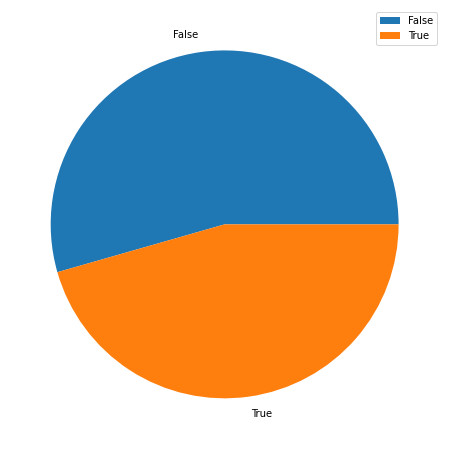

Количество пользователей с типом подписки:  
                   count
subscription_type       
False                835
True                 699
Соотношение пользователей с типом подписки (%):  
                   count
subscription_type       
False               54.4
True                45.6


In [36]:
# построем круговую диаграмму, показывающий соотношение пользователей с подпиской и без подписки
(
    df_users_go.pivot_table(index='subscription_type', values='user_id', aggfunc='count')  
    .plot(kind='pie', figsize=(8, 8), grid=True, subplots=True)
)
#plt.title('Соотношение пользователей с типом подписки')
plt.ylabel('')
plt.show()
subscription_type_groupby = df_users_go.groupby(['subscription_type'])['subscription_type'].agg(['count'])
subscription_type_fraction = (subscription_type_groupby / subscription_type_groupby.sum()) * 100
print('Количество пользователей с типом подписки:  ')
print(subscription_type_groupby)  
print('Соотношение пользователей с типом подписки (%):  ')
print(subscription_type_fraction.round(1))

Пользователей без подписки 835 человек, пользователей с подпиской 699 человек. Соотвественно, пользователей без подписки (54,4%) больше, чем пользователей с подпиской (45,6%). 

**Исследуем возраст пользователей**

Построем гистограмму распределения для нахождения возраста целевой аудитории. Выведем на экран самый популярный возраст пользователей.

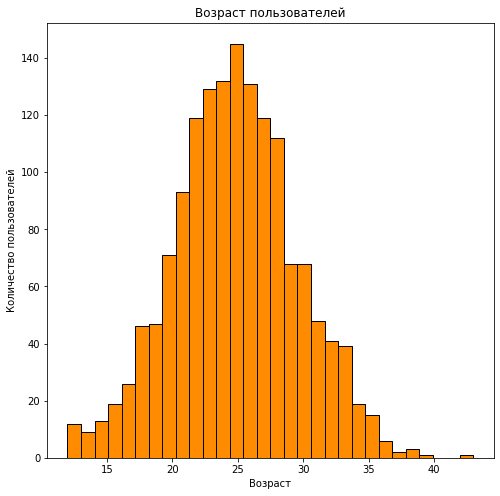

Основная информация:
count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64
Самый популярный возраст пользователей: 
     count
age       
25     145
24     132
26     131
23     129
27     119


In [37]:
# построем гистограмму распределения
df_users_go['age'].plot(kind='hist', bins=30, color='darkorange', ec='black', figsize=(8, 8)) 
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
plt.show()
print('Основная информация:')
print(df_users_go['age'].describe())
print('Самый популярный возраст пользователей: ')
print(df_users_go.groupby(['age'])['age'].agg(['count']).sort_values(by='count', ascending=False).head())

Средний возраст пользователя составляет 25 лет. Медиана и среднее практически совпадают. Наибольшей популярностью сервис пользуется у людей от 22 до 28 лет. По гистограмме можно определить, что результаты измерений имеют нормальное распределение. 

**Найдем расстояние, которое пользователь преодолел за одну поездку**

Построем гистограмму распределения для нахождения расстояния, которое пользователь преодолел за одну поездку. 

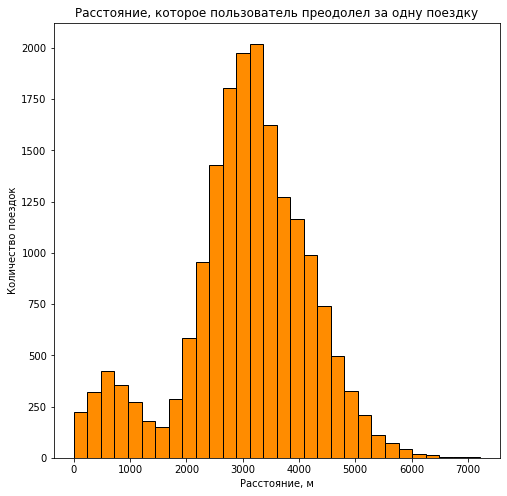

Основная информация:


count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

In [38]:
# построем гистограмму распределения
df_rides_go['distance'].plot(kind='hist', bins=30, color='darkorange', ec='black', figsize=(8, 8)) 
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество поездок')
plt.show()
print('Основная информация:')
df_rides_go['distance'].describe()

На гистограмме можно заметить всплеск поездок на расстояние около 500 м. Возможно пользователи совершали столь короткие поездку, чтобы добраться до ТЦ, метро или автобусной остановки. Чаще всего расстояние одной поездки составляет от 2500 до 3800 м. Среднее расстояние составляет приблизительно 3100 м. Медиана и среднее практически совпадают. Результаты измерений имеют нормальное распределение.

**Исследуем продолжительность поездок**

Построем гистограмму распределения количества поездок по их продолжительности.

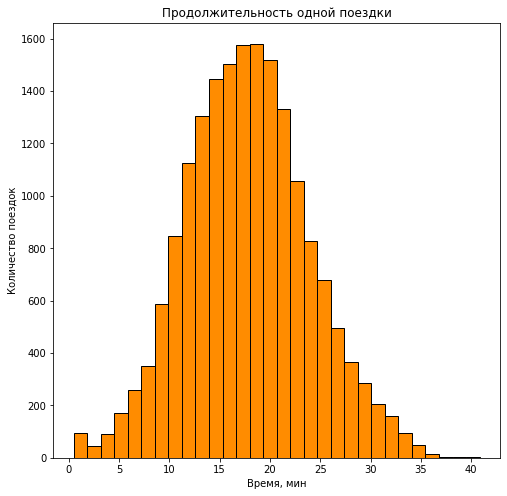

Основная информация:


count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [39]:
# построем гистограмму распределения
df_rides_go['duration'].plot(kind='hist', bins=30, color='darkorange', ec='black', figsize=(8, 8)) 
plt.title('Продолжительность одной поездки')
plt.xlabel('Время, мин')
plt.ylabel('Количество поездок')
plt.show()
print('Основная информация:')
df_rides_go['duration'].describe()

Среднее время одной поездки составляет приблизительно 17,7 мин. Медиана и среднее практически совпадают. Результаты измерений имеют нормальное распределение. Стоит лишь отметить небольшой выброс в приблизительно 100 поездок по времени менее 1 мин. Возможно, самокаты были неисправны.   

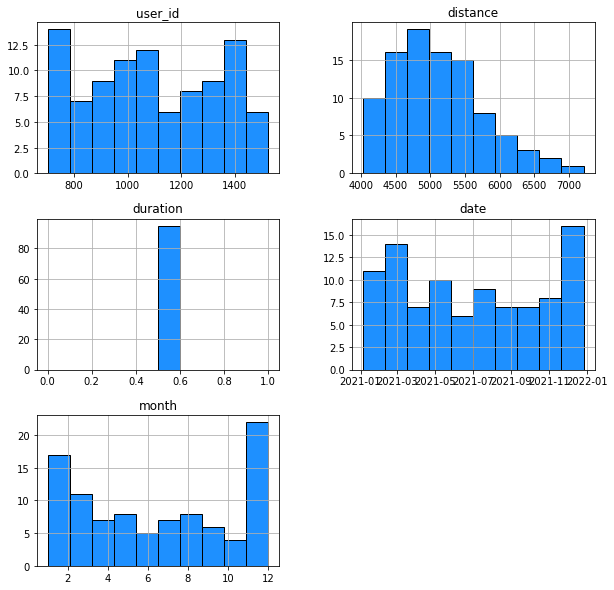

In [40]:
rides_1 = df_rides_go.loc[df_rides_go['duration'] < 1]
rides_1.hist(figsize=(10, 10), color='dodgerblue', ec='black',)
plt.show()

Смущает то, что получилось на графике distance. Слишком большая дистанция для времени меньше минуты. Соотвество и скорость. Значит имеем дело с аномалиями. 

In [41]:
df_rides_go.loc[df_rides_go['duration'] < 1]

,user_id,distance,duration,date,month
6531,701,4196.445201,0.5,2021-08-31,8
6570,704,4830.824371,0.5,2021-10-14,10
6680,712,4684.004397,0.5,2021-03-04,3
6695,713,5215.642710,0.5,2021-02-25,2
6768,718,5197.436649,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1
17242,1477,6724.932981,0.5,2021-01-12,1
17314,1483,4445.481070,0.5,2021-03-06,3
17505,1496,5722.551787,0.5,2021-02-14,2


In [42]:
df_rides_go.loc[df_rides_go['duration'] == 0.5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 6531 to 17909
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   95 non-null     int64         
 1   distance  95 non-null     float64       
 2   duration  95 non-null     float64       
 3   date      95 non-null     datetime64[ns]
 4   month     95 non-null     int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 4.5 KB


Все аномалии происходят в 0,5 мин. 

**Выводы**  
На этапе проведения исследовательского анализа данных мы описали и визуализировали общую информацию о пользователях и поездках.   
1. Нашли частоту встречаемости городов;  
В таблице содержится информация о 8 городах. Лидерами встречаемости сервиса среди пользователей являются Пятигорск 14,3%, Екатеринбург 13,3% и Ростов-на-Дону 12,9% упоминаний. Замыкает список Москва 11%.
2. Нашли соотношение пользователей с подпиской и без подписки;  
Пользователей без подписки 835 человек, пользователей с подпиской 699 человек. Соотвественно, пользователей без подписки (54,4%) больше, чем пользователей с подпиской (45,6%). 
3. Нашли целевой возраст пользователей;  
Средний возраст пользователя составляет 25 лет. Медиана и среднее практически совпадают. Наибольшей популярностью сервис пользуется у людей от 22 до 28 лет. По гистограмме можно определить, что результаты измерений имеют нормальное распределение.
4. Нашли расстояние, которое пользователь преодолел за одну поездку;  
На гистограмме можно заметить всплеск поездок на расстояние около 500 м. Возможно пользователи совершали столь короткие поездку, чтобы добраться до ТЦ, метро или автобусной остановки. Чаще всего расстояние одной поездки составляет от 2500 до 3800 м. Среднее расстояние составляет приблизительно 3100 м. Медиана и среднее практически совпадают. Результаты измерений имеют нормальное распределение.
5. Нашли продолжительность поездок.  
Среднее время одной поездки составляет приблизительно 17,7 мин. Медиана и среднее практически совпадают. Результаты измерений имеют нормальное распределение. Стоит лишь отметить небольшой выброс в приблизительно 100 поездок по времени менее 1 мин. Значит имеем дело с аномалиями.  

## Шаг 4. Объединение данных

1. Объединим данные о пользователях, поездках и подписках в один датафрейм.  
2. Создадим ещё два датафрейма из датафрейма:  
- c данными о пользователях без подписки;  
- с данными о пользователях с подпиской.  
3. Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

**Объединим данные о пользователях, поездках и подписках в один датафрейм методом merge().**

Создадим новый датафрейм df_common. Методом merge() сначала объединим датафреймы df_users_go и df_rides_go по "user_id". Затем объединим полученный датафрейм с датафреймом df_subscriptions_go по "subscription_type". Выведем первые 5 строк нового датафрейма.

In [43]:
df_common = df_users_go.merge(df_rides_go, on='user_id').merge(df_subscriptions_go, on='subscription_type')
df_common.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,True,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,True,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,True,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,True,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,True,4028.687306,26.265803,2021-08-28,8,6,0,199


In [44]:
print('Количество строк датафрейма df_rides_go:', df_rides_go['user_id'].count())
print('Количество строк датафрейма df_common:', df_common['user_id'].count())

Количество строк датафрейма df_rides_go: 18068
Количество строк датафрейма df_common: 18068


Датафреймы имеют одинаковое количество строк.

**Создадим датафрейм из общего датафрейма c данными о пользователях без подписки**   

In [45]:
subscription_free = df_common.loc[df_common['subscription_type'] == False]
subscription_free.head() 

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,False,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,False,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,False,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,False,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,False,3047.379435,17.427673,2021-02-14,2,8,50,0


**Создадим датафрейм из общего датафрейма c данными о пользователях с подпиской**   

In [46]:
subscription_ultra = df_common.loc[df_common['subscription_type'] == True]
subscription_ultra.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,True,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,True,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,True,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,True,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,True,4028.687306,26.265803,2021-08-28,8,6,0,199


**Визуализируем информацию о расстоянии поездок для пользователей обеих категорий.**

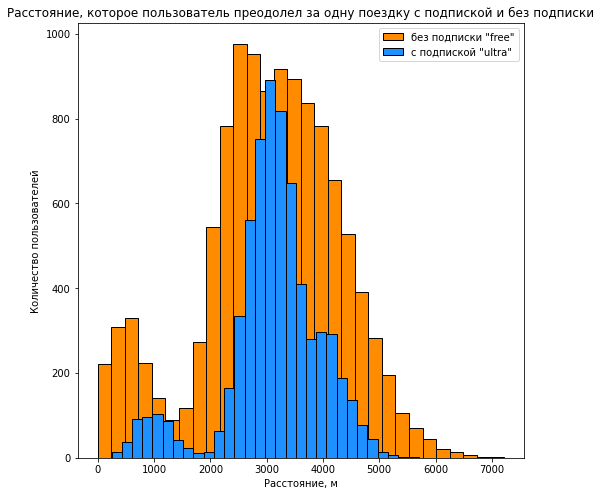

In [47]:
# построем гистограмму распределения без подписки
subscription_free['distance'].plot(kind='hist', bins=30, color='darkorange', ec='black', figsize=(8, 8), 
                                   label='без подписки "free"') 
# построем гистограмму распределения с подпиской
subscription_ultra['distance'].plot(kind='hist', bins=30, color='dodgerblue', ec='black', figsize=(8, 8), 
                                    label='с подпиской "ultra"') 
plt.title('Расстояние, которое пользователь преодолел за одну поездку с подпиской и без подписки')
plt.xlabel('Расстояние, м')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

**Визуализируем информацию о времени поездок для пользователей обеих категорий.**

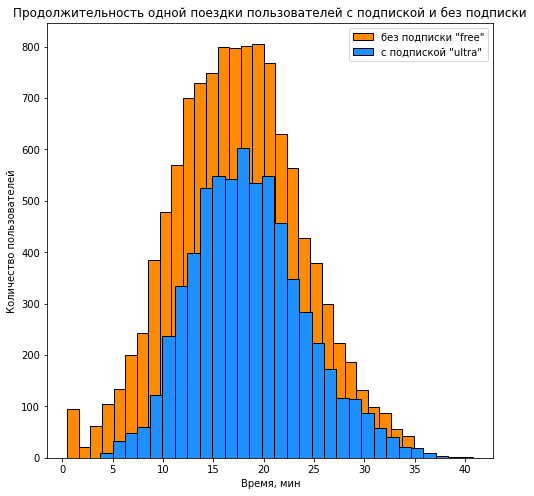

In [48]:
# построем гистограмму распределения без подписки
subscription_free['duration'].plot(kind='hist', bins=30, color='darkorange', ec='black', figsize=(8, 8), 
                                   label='без подписки "free"') 
# построем гистограмму распределения с подпиской
subscription_ultra['duration'].plot(kind='hist', bins=30, color='dodgerblue', ec='black', figsize=(8, 8), 
                                    label='с подпиской "ultra"') 
plt.title('Продолжительность одной поездки пользователей с подпиской и без подписки')
plt.xlabel('Время, мин')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

Гистограммы наглядно демонстрируют, что расстояние, которое пользователи преодовали за одну поездку, и время одной поездки у пользователей с подпиской ниже, чем у пользователей без подписки. Исключением является лишь расстояние в 3000 м, которое пользователь преодолел за одну поездку. Общее количество пользователей в этом значении больше с подпиской, чем без нее.

**Выводы**   
На этом этапе было сделано следующее:  
1. Объединены данные о пользователях, поездках и подписках в один датафрейм.  
Создан новый датафрейм df_common. Методом merge() сначала объедины датафреймы df_users_go и df_rides_go по "user_id". Затем объеден полученный датафрейм с датафреймом df_subscriptions_go по "subscription_type". Выведены первые 5 строк нового датафрейма. Новый дататфрейм проверен на пропуски.  
2. Созданы ещё два датафрейма из датафрейма:  
- c данными о пользователях без подписки;  
- с данными о пользователях с подпиской.  
3. Визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий.
Гистограммы наглядно демонстрируют, что расстояние, которое пользователи преодовали за одну поездку, и время одной поездки у пользователей с подпиской ниже, чем у пользователей без подписки. Исключением является лишь расстояние в 3000 м, которое пользователь преодолел за одну поездку. Общее количество пользователей в этом значении больше с подпиской, чем без нее.

## Шаг 5. Подсчёт выручки

1. Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.  
2. В этот же датафрейм добавим столбец с помесячной выручкой, которую принёс каждый пользователь.   

**Создадим датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.**

In [49]:
df_common['duration'] = np.ceil(df_common['duration']) # каждое значение из столбца duration округляем с помощью «потолка»

In [50]:
df_common_agg = df_common.pivot_table(index= ['user_id', 'month'], values = ['distance', 'duration'], 
                                      aggfunc = ['count', 'sum']) # создадим сводную таблицу
df_common_agg.columns = ['count_distance', 'count_duration', 'sum_distance', 'sum_duration'] # переменуем названия столбцов
df_common_agg = df_common_agg.drop(labels=['count_duration'], axis=1).reset_index() # удалим дублирующийся столбец
df_common_agg

,user_id,month,count_distance,sum_distance,sum_duration
0,1,1,2,7027.511294,42.0
1,1,4,1,754.159807,7.0
2,1,8,2,6723.470560,46.0
3,1,10,2,5809.911100,32.0
4,1,11,3,7003.499363,56.0
...,...,...,...,...,...
11326,1534,6,2,3409.468534,26.0
11327,1534,8,2,7622.453034,48.0
11328,1534,9,1,4928.173852,23.0
11329,1534,11,4,13350.015305,78.0


Мы получили новый датафрейм, в котором содержится информация для каждого пользователя за каждый месяц:  
"sum_distance" - суммарное расстояние (м),  
"count_distance" - количество поездок,  
"sum_duration" - суммарное время (мин).

**Добавим столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратимся к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа.**

In [51]:
df_common_agg = df_common_agg.merge(df_users_go, on='user_id', how='left')
df_common_agg = df_common_agg.merge(df_subscriptions_go, on='subscription_type', how='left')
df_common_agg

,user_id,month,count_distance,sum_distance,sum_duration,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,2,7027.511294,42.0,Кира,22,Тюмень,True,6,0,199
1,1,4,1,754.159807,7.0,Кира,22,Тюмень,True,6,0,199
2,1,8,2,6723.470560,46.0,Кира,22,Тюмень,True,6,0,199
3,1,10,2,5809.911100,32.0,Кира,22,Тюмень,True,6,0,199
4,1,11,3,7003.499363,56.0,Кира,22,Тюмень,True,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,2,3409.468534,26.0,Альберт,25,Краснодар,False,8,50,0
11327,1534,8,2,7622.453034,48.0,Альберт,25,Краснодар,False,8,50,0
11328,1534,9,1,4928.173852,23.0,Альберт,25,Краснодар,False,8,50,0
11329,1534,11,4,13350.015305,78.0,Альберт,25,Краснодар,False,8,50,0


Найдем помесячную выручку по формуле: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки
× общая продолжительность всех поездок в минутах + стоимость подписки. Добавим новый столбец "revenue" в датафрейм.

In [52]:
df_common_agg['revenue'] = df_common_agg['start_ride_price'] * df_common_agg['count_distance'] + df_common_agg['minute_price'] * df_common_agg['sum_duration'] + df_common_agg['subscription_fee']
df_common_agg['revenue'] = df_common_agg['revenue'].astype(int) # изменим тип данных
df_common_agg = df_common_agg[['user_id', 'name', 'subscription_type', 'month', 'count_distance', 'sum_distance', 'sum_duration', 'revenue']] 
df_common_agg

,user_id,name,subscription_type,month,count_distance,sum_distance,sum_duration,revenue
0,1,Кира,True,1,2,7027.511294,42.0,451
1,1,Кира,True,4,1,754.159807,7.0,241
2,1,Кира,True,8,2,6723.470560,46.0,475
3,1,Кира,True,10,2,5809.911100,32.0,391
4,1,Кира,True,11,3,7003.499363,56.0,535
...,...,...,...,...,...,...,...,...
11326,1534,Альберт,False,6,2,3409.468534,26.0,308
11327,1534,Альберт,False,8,2,7622.453034,48.0,484
11328,1534,Альберт,False,9,1,4928.173852,23.0,234
11329,1534,Альберт,False,11,4,13350.015305,78.0,824


Получили таблицу, содержащую следующую информацию по каждому пользователю:  
"user_id" - уникальный идентификатор пользователя,  
"name" - имя,  
"subscription_type" - тип подписки,
"month" - количество месяцев пользования сервисом,  
"count_distance" - количество поездок,  
"sum_distance" - суммарное расстояние (м),  
"sum_duration" - суммарное время (мин),  
"revenue" - ежемесячная выручка (руб).

Рассмотрим столбец с ежемесячной выручкой.

In [53]:
df_common_agg['revenue'].describe()

count    11331.000000
mean       342.303504
std        153.875346
min         58.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1444.000000
Name: revenue, dtype: float64

Ежемесячная выручка сервиса аренды самокатов от каждого пользователя в среднем составляет от 320 до 340 рублей. Проанализуем от каких пользователей (с подпиской или без нее) прибыли будет выше. Добавим столбец выручки для фатафреймов пользователей с подпиской и без подписки. 

In [54]:
# добавим столбец выручки для фатафрейма пользователей без подписки
subscription_free = subscription_free.merge(df_common_agg, on='user_id', how='left')  
# добавим столбец выручки для фатафрейма пользователей с подпиской
subscription_ultra = subscription_ultra.merge(df_common_agg, on='user_id', how='left') 

Найдем зависимость выручки от месяца для пользователей с подпиской и без подписки.

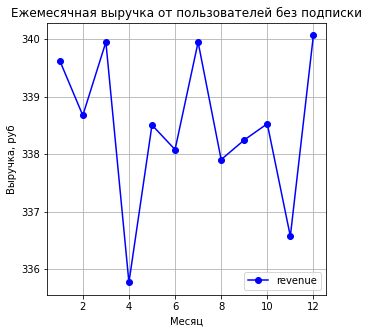

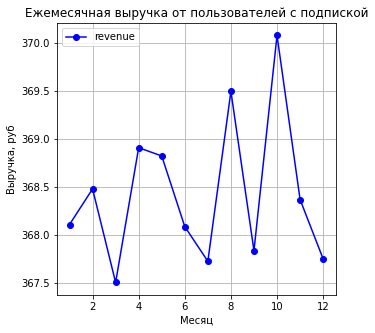

In [55]:
subscription_free.pivot_table(index='month_x', values='revenue').plot(color='b', figsize=(5, 5), grid=True, style='o-')
plt.title('Ежемесячная выручка от пользователей без подписки')
plt.xlabel('Месяц')
plt.ylabel('Выручка, руб')
subscription_ultra.pivot_table(index='month_x', values='revenue').plot(color='b', figsize=(5, 5), grid=True, style='o-')
plt.title('Ежемесячная выручка от пользователей с подпиской')
plt.xlabel('Месяц')
plt.ylabel('Выручка, руб')
plt.show()

Максимальная ежемесячная выручка от пользователя с подпиской составляет чуть больше 370 руб., от пользователя без подписки чуть больше 340 руб. Не стоит забывать, что пользователей без подписки 835 человек, а пользователей с подпиской 699 человек.  
Построем гистограммы распределения, с учетом общего количества пользователей с подпиской и без нее.

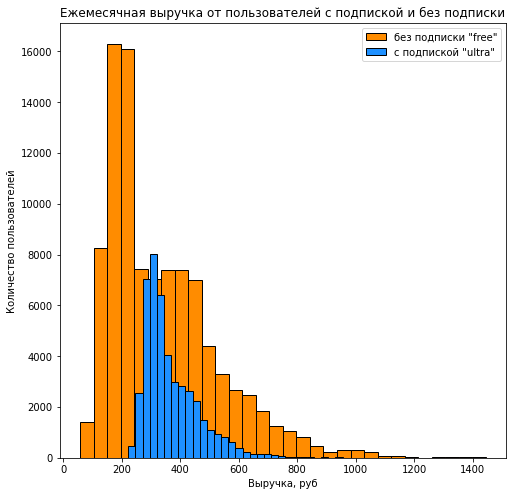

In [56]:
# построем гистограмму распределения без подписки
subscription_free['revenue'].plot(kind='hist', bins=30, color='darkorange', ec='black', figsize=(8, 8), 
                                  label='без подписки "free"') 
# построем гистограмму распределения с подпиской
subscription_ultra['revenue'].plot(kind='hist', bins=30, color='dodgerblue', ec='black', figsize=(8, 8), 
                                   label='с подпиской "ultra"') 
plt.title('Ежемесячная выручка от пользователей с подпиской и без подписки')
plt.xlabel('Выручка, руб')
plt.ylabel('Количество пользователей')
plt.legend(loc='upper right')
plt.show()

Ежемесячная выручка сервиса аренды самокатов от пользователей без подписки значительно выше прибыли от пользователей с подпиской. 

In [57]:
print('Общая сумма выручки сервиса от пользователей без подписки составляет: ', subscription_free['revenue'].sum(), 'руб.')
print('Общая сумма выручки сервиса от пользователей с подпиской составляет: ', subscription_ultra['revenue'].sum(), 'руб.')
print('Общая сумма выручки сервиса от пользователей без подписки выше стоимости выручки с подпиской на', 
      subscription_free['revenue'].sum() - subscription_ultra['revenue'].sum(), 'руб.')

Общая сумма выручки сервиса от пользователей без подписки составляет:  33174524 руб.
Общая сумма выручки сервиса от пользователей с подпиской составляет:  16765929 руб.
Общая сумма выручки сервиса от пользователей без подписки выше стоимости выручки с подпиской на 16408595 руб.


В результате общая сумма выручки сервиса от пользователей без подписки практически в два раза выше стоимости выручки с подпиской. Всё же необходимо рассмотреть помесячную выручку.

**Выводы**  
На данном этапе был проведен подсчёт выручки:  
1. Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.  
2. В этот же датафрейм добавлен столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого мы обратились к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.   
- Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлили до следующего целого числа.   
- Нашли помесячную выручку по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки. 
- Добавили новый столбец "revenue" в датафрейм.  
- Получили таблицу, содержащую следующую информацию по каждому пользователю:
"user_id" - уникальный идентификатор пользователя,
"name" - имя,
"subscription_type" - тип подписки, "month" - количество месяцев пользования сервисом,
"count_distance" - количество поездок,
"sum_distance" - суммарное расстояние (м),
"sum_duration" - суммарное время (мин),
"revenue" - ежемесячная выручка (руб).
3. Проанализирована информация о ежемесячной выручки:
- Ежемесячная выручка сервиса аренды самокатов от каждого пользователя в среднем составляет от 320 до 340 рублей. 
- Максимальная ежемесячная выручка от пользователя с подпиской составляет чуть больше 370 руб., от пользователя без подписки чуть больше 340 руб.  
- Ежемесячная выручка сервиса аренды самокатов от пользователей без подписки значительно выше прибыли от пользователей с подпиской. 
- Общая сумма выручки сервиса от пользователей без подписки составляет:  33174524 руб.  
- Общая сумма выручки сервиса от пользователей с подпиской составляет:  16765929 руб.  
- Общая сумма выручки сервиса от пользователей без подписки выше стоимости выручки с подпиской на 16408595 руб.  

В результате общая сумма выручки сервиса от пользователей без подписки практически в два раза выше стоимости выручки с подпиской. Всё же необходимо рассмотреть помесячную выручку.


## Шаг 6. Проверка гипотез

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.  
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.  
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.  
3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.  
4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?  

**1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверим гипотезу. Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.** 

Нулевая гипотеза Н0: Средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки.  
Альтернативная гипотеза Н1: Средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки. 

In [58]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(subscription_ultra['duration'], subscription_free['duration'], alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.923560593782122e-234
Отвергаем нулевую гипотезу


**С большей долей вероятности можем сказать, что средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки.**

In [59]:
print('Средняя продолжительность поездок пользователей с подпиской равна', subscription_ultra['duration'].mean())
print('Средняя продолжительность поездок пользователей без подписки равна', subscription_free['duration'].mean())

Средняя продолжительность поездок пользователей с подпиской равна 18.52097244940167
Средняя продолжительность поездок пользователей без подписки равна 17.390973908811073


**2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверим гипотезу и сделаем выводы.**

Нулевая гипотеза Н0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составляет 3130 метров.  
Альтернативная гипотеза Н1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку больше 3130 метров.

In [60]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_1samp(subscription_ultra['distance'], 3130, alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9998164060389575
Не получилось отвергнуть нулевую гипотезу


**Не получилось отвергнуть гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров.**

In [61]:
print('Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составляет', 
      subscription_ultra['distance'].mean())

Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составляет 3116.034782456601


**3. Проверем гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделаем вывод.**

Нулевая гипотеза Н0: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.
Альтернативная гипотеза Н1: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

In [62]:
alpha = 0.05 # уровень статистической значимости
results = st.ttest_ind(subscription_ultra['revenue'], subscription_free['revenue'], alternative='greater')
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.3782707027831515e-222
Отвергаем нулевую гипотезу


**С большей долей вероятности можем сказать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**

In [63]:
print('Помесячная выручка от пользователей с подпиской равна', subscription_ultra['revenue'].mean())
print('Помесячная выручка от пользователей без подписки равна', subscription_free['revenue'].mean())

Помесячная выручка от пользователей с подпиской равна 368.4252752323818
Помесячная выручка от пользователей без подписки равна 338.50173462307663


**4. Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него.**  

Две зависимые (парные) выборки, т.к. файл содержит данные для те же пользователей.  
st.ttest_rel(before, after, alternative='greater')  
Альтернативная гипотеза: количество обращений в техподдержку увеличилось.  

**Вывод**  
На данном этапе были проверны следующие гипотезы:  
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.  
Нулевая гипотеза Н0: Средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки.  
Альтернативная гипотеза Н1: Средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки. 
Вывод: **С большей долей вероятности можем сказать, что средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки.**
Проверка: Средняя продолжительность поездок пользователей с подпиской равна 18.5. Средняя продолжительность поездок пользователей без подписки равна 17.4
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.  
Нулевая гипотеза Н0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составляет 3130 метров.
Альтернативная гипотеза Н1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку меньше 3130 метров.
Вывод: **Не получилось отвергнуть гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку меньше 3130 метров.**  
Проверка: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составляет 3116 метров.  
3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.  
Нулевая гипотеза Н0: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.
Альтернативная гипотеза Н1: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  
Вывод: **С большей долей вероятности можем сказать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**  
Проверка: Помесячная выручка от пользователей с подпиской равна 368.4 руб., помесячная выручка от пользователей без подписки равна 338.5 руб.  
4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?  
Две зависимые (парные) выборки, т.к. файл содержит данные для те же пользователей.  
st.ttest_rel(before, after, alternative='greater')  
Альтернативная гипотеза: количество обращений в техподдержку увеличилось.  

## Шаг 7. Распределения

**1. Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей. Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.** 

In [64]:
target_clients = 100  # Целевое количество клиентов для продления подписки
p_renewal = 0.1       # Вероятность продления подписки

# Подбор значения параметра n
n = 1
while binom.cdf(target_clients - 1, n, p_renewal) > 0.05:
    n += 1

# Вывод 
print(f"Минимальное количество промокодов: {n}")
print(f"Вероятность не выполнить план при таком количестве промокодов: {binom.cdf(target_clients - 1, n, p_renewal):.3%}")

Минимальное количество промокодов: 1161
Вероятность не выполнить план при таком количестве промокодов: 4.976%


**2. Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.**

In [65]:
# задаём параметры биномиального распределения
n = 1000000
p = 0.4

mu = n * p
sigma = (n * p * (1 - p)) ** 0.5

# задаём нормальное распределение
distr = st.norm(mu, sigma)

x = 399500

# считаем вероятность получить значение, равное x или меньше
result = distr.cdf(x)

print('Вероятность того, что push-уведомления откроют не более 399,5 тыс. пользователей:',
      round(result, 2))

Вероятность того, что push-уведомления откроют не более 399,5 тыс. пользователей: 0.15


## Шаг 8. Общие выводы

**На первом этапе** загрузки данных мы познакомились с тремя датафреймами.  

В первой таблице "users_go.csv" находится информация о пользователях сервиса аренды самокатов GoFast.
В стобце "user_id" - уникальный идентификатор пользователя, в столбце "name" - имя пользователя, в столбце "age" - возраст, в столбце "city" - город, в столбце "subscription_type" - тип подписки (free, ultra).
Подсчёт явных дубликатов в таблице показал, что в ней находится 31 дубликат. Это составляет около 2% от общего количество строк. На этапе предобработки данных эти дубликаты можно будет удалить. Нет аномальных или нестандартных значений.

Во второй таблице "rides_go.csv" находится информация о поездках пользователей сервиса аренды самокатов GoFast.
В стобце "user_id" - уникальный идентификатор пользователя, в столбце "distance" - расстояние, которое пользователь проехал в текущей сессии (в метрах), в столбце "duration" - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку», в столбце "date" - дата совершения поездки. Возможно наличие выбросов в столбцах "distance" и "duration". Необходимо проверить на этапе предобработки данных.

В третьей таблице "subscriptions_go.csv" находится информация о подписках пользователей сервиса аренды самокатов GoFast.
В стобце "subscription_type" - тип подписки, в столбце "minute_price" - стоимость одной минуты поездки по данной подписке, в столбце "start_ride_price" - стоимость начала поездки, в столбце "subscription_fee" - стоимость ежемесячного платежа. Нет аномальных или нестандартных значений.  
Не встречаются пропуски в данных, в названиях колонок нет расхождения с хорошим стилем.  

**На этапе предобработки данных** мы изменили тип данных во второй таблице "rides_go.csv" в столбце "date". Столбец "date" приведен к типу даты "pandas". На основе этого столбца мы создали новый столбец "month" с номером месяца. Нашли общий период. Период: c 2021-01-01 00:00:00 по 2021-12-30 00:00:00.    

Проверили на наличие пропущенных значений и дубликатов в датафреймах. Подсчёт явных дубликатов в таблице "users_go.csv" показал, что в ней находится 31 дубликат. Мы их удалили. Пропущенных значений не обнаружено. Неявных дубликатов не обнаружено.  

При проверке столбцов "distance" и "duration" на наличие выбросов по борсплоту были найдены значения, выходящие за границы усов.   
В столбце "distance" показано расстояние, которое пользователь проехал в текущей сессии (в метрах). Минимальное значение составляет менее 1 метра при среднем значении 3100 метров. Аналогичная ситуация и в столбце "duration", показывающем продолжительность сессии (в минутах). Минимальное значение составляет составляет 0,5 мин при среднем значении 17,7 мин.  
По боксплоту можно сделать выводы, что значения выходящие за нижную и за верхнюю границы яляются выбросами. В нашем случае, скорее вызывают сомнения значения, выходящие только за нижнии границы. Минимальные значения могут означать то, что самокаты не исправны.  

**На этапе проведения исследовательского анализа данных** мы описали и визуализировали общую информацию о пользователях и поездках.   
1. Нашли частоту встречаемости городов;  
В таблице содержится информация о 8 городах. Лидерами встречаемости сервиса среди пользователей являются Пятигорск 14,3%, Екатеринбург 13,3% и Ростов-на-Дону 12,9% упоминаний. Замыкает список Москва 11%.
2. Нашли соотношение пользователей с подпиской и без подписки;  
Пользователей без подписки 835 человек, пользователей с подпиской 699 человек. Соотвественно, пользователей без подписки (54,4%) больше, чем пользователей с подпиской (45,6%). 
3. Нашли целевой возраст пользователей;  
Средний возраст пользователя составляет 25 лет. Медиана и среднее практически совпадают. Наибольшей популярностью сервис пользуется у людей от 22 до 28 лет. По гистограмме можно определить, что результаты измерений имеют нормальное распределение.
4. Нашли расстояние, которое пользователь преодолел за одну поездку;  
На гистограмме можно заметить всплеск поездок на расстояние около 500 м. Возможно пользователи совершали столь короткие поездку, чтобы добраться до ТЦ, метро или автобусной остановки. Чаще всего расстояние одной поездки составляет от 2500 до 3800 м. Среднее расстояние составляет приблизительно 3100 м. Медиана и среднее практически совпадают. Результаты измерений имеют нормальное распределение.
5. Нашли продолжительность поездок.  
Среднее время одной поездки составляет приблизительно 17,7 мин. Медиана и среднее практически совпадают. Результаты измерений имеют нормальное распределение. Стоит лишь отметить небольшой выброс в приблизительно 100 поездок по времени менее 1 мин. Значит имеем дело с аномалиями.   

**В следующем этапе были созданы новые датафреймы.**  
1. Объединены данные о пользователях, поездках и подписках в один датафрейм.  
Создан новый датафрейм df_common. Методом merge() сначала объедины датафреймы df_users_go и df_rides_go по "user_id". Затем объеден полученный датафрейм с датафреймом df_subscriptions_go по "subscription_type". Выведены первые 5 строк нового датафрейма. Новый дататфрейм проверен на пропуски.  
2. Созданы ещё два датафрейма из датафрейма:  
- c данными о пользователях без подписки;  
- с данными о пользователях с подпиской.  
3. Визуализирована информация о расстоянии и времени поездок для пользователей обеих категорий.
Гистограммы наглядно демонстрируют, что расстояние, которое пользователи преодовали за одну поездку, и время одной поездки у пользователей с подпиской ниже, чем у пользователей без подписки. Исключением является лишь расстояние в 3000 м, которое пользователь преодолел за одну поездку. Общее количество пользователей в этом значении больше с подпиской, чем без нее.

**Затем проведен подсчёт выручки**:  
1. Создан датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдено суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.  
2. В этот же датафрейм добавлен столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого мы обратились к информации об условиях оплаты для подписчиков и тех, у кого нет подписки.   
- Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округлили до следующего целого числа.   
- Нашли помесячную выручку по формуле: стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки. 
- Добавили новый столбец "revenue" в датафрейм.  
- Получили таблицу, содержащую следующую информацию по каждому пользователю:
"user_id" - уникальный идентификатор пользователя,
"name" - имя,
"subscription_type" - тип подписки, "month" - количество месяцев пользования сервисом,
"count_distance" - количество поездок,
"sum_distance" - суммарное расстояние (м),
"sum_duration" - суммарное время (мин),
"revenue" - ежемесячная выручка (руб).
3. Проанализирована информация о ежемесячной выручки:
- Ежемесячная выручка сервиса аренды самокатов от каждого пользователя в среднем составляет от 320 до 340 рублей. 
- Максимальная ежемесячная выручка от пользователя с подпиской составляет чуть больше 370 руб., от пользователя без подписки чуть больше 340 руб.  
- Ежемесячная выручка сервиса аренды самокатов от пользователей без подписки значительно выше прибыли от пользователей с подпиской. 
- Общая сумма выручки сервиса от пользователей без подписки составляет:  33174524 руб.  
- Общая сумма выручки сервиса от пользователей с подпиской составляет:  16765929 руб.  
- Общая сумма выручки сервиса от пользователей без подписки выше стоимости выручки с подпиской на 16408595 руб.  

В результате общая сумма выручки сервиса от пользователей без подписки практически в два раза выше стоимости выручки с подпиской. Всё же необходимо рассмотреть помесячную выручку.


**На этапе проверки гипотез** были проверны следующие гипотезы:  
1. Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.  
Нулевая гипотеза Н0: Средняя продолжительность поездок пользователей с подпиской равна средней продолжительности поездок пользователей без подписки.  
Альтернативная гипотеза Н1: Средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки. 
Вывод: **С большей долей вероятности можем сказать, что средняя продолжительность поездок пользователей с подпиской больше средней продолжительности поездок пользователей без подписки.**
Проверка: Средняя продолжительность поездок пользователей с подпиской равна 18.5. Средняя продолжительность поездок пользователей без подписки равна 17.4
2. Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.  
Нулевая гипотеза Н0: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составляет 3130 метров.
Альтернативная гипотеза Н1: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку меньше 3130 метров.
Вывод: **Не получилось отвергнуть гипотезу о том, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку меньше 3130 метров.**  
Проверка: Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку составляет 3116 метров.  
3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.  
Нулевая гипотеза Н0: Помесячная выручка от пользователей с подпиской по месяцам равна выручке от пользователей без подписки.
Альтернативная гипотеза Н1: Помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.  
Вывод: **С большей долей вероятности можем сказать, что помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.**  
Проверка: Помесячная выручка от пользователей с подпиской равна 368.4 руб., помесячная выручка от пользователей без подписки равна 338.5 руб.  
4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?  
Две зависимые (парные) выборки, т.к. файл содержит данные для те же пользователей.  
st.ttest_rel(before, after, alternative='greater')  
Альтернативная гипотеза: количество обращений в техподдержку увеличилось.  